# Planetary microlensing


The structure of the caustics plays a central role in the phenomenology of planetary microlensing light curves and, thus, the detectability of planets with the microlensing method. 

As we have seen, caustic topologies are generally classified as
* close: $d<d_{c}=(m_1^{1/3}+m_2^{1/3})^{-3/4}$
* wide: $d>d_{w}=(m_1^{1/3}+m_2^{1/3})^{3/2}$
* intermediate or resonant: $d_{IC}<d<d_{IW}$

The planetary perturbation is genereally very small and the caustic configuration is either close or wide. Intermediate (or resonant) configurations are possible only for a limited range of separations:

$$
d'_w-d'_c \sim \frac{9}{4}q^{1/3}
$$

where $d'_w=d_w/m_2^{1/2}=(1+q^{1/3})^{3/2}\sim 1+3/2q^{1/3}$ and $d'_c=d_c/m_2^{-1/4}=(1+q^{1/3})^{-3/4}\sim1-3/4q^{1/3}$.



## Central caustic perturbations
In both the wide and the close caustic configurations, the primary caustic (or central caustic) has an arrow-head shape, with the tip of the arrow pointing towards the planet.

Let's consider what kind of perturbations this particular caustic shape produces on the light curve of a source passing close to the star.

-0.715


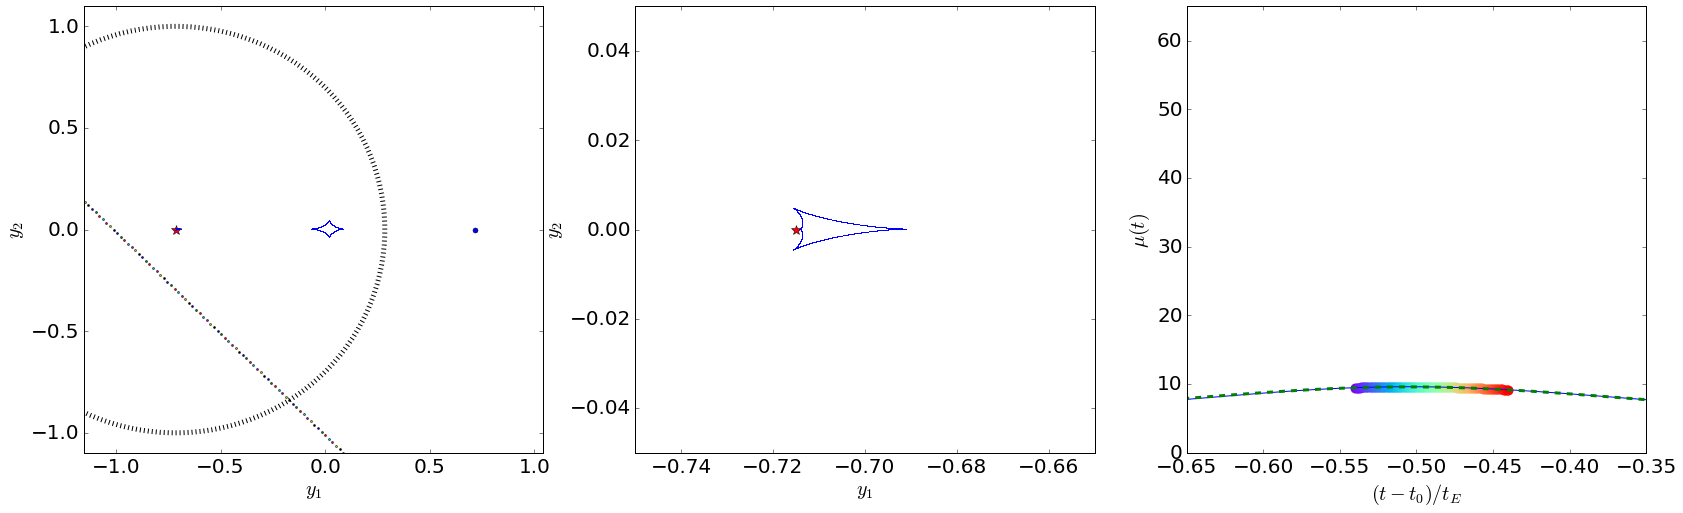

In [83]:
def impactPar(zs,phi,y0):
    y1=zs.real+np.cos(phi)*y0
    y2=zs.imag-np.sin(phi)*y0
    if (y1<0):
        return(-np.sqrt(y1*y1+y2*y2))
    else:
        return(np.sqrt(y1*y1+y2*y2))

def detA(m1,m2,z1,z2,z):
    deta=1-np.abs(m1/(np.conj(z)-np.conj(z_1))**2+m2/(np.conj(z)-np.conj(z_2))**2)
    return(deta)
    
def findImages(z_1,z_2,m1,m2,zs):
    m=0.5*(m1+m2)
    Dm=0.5*(m2-m1)
    
    c5=z_1**2-np.conj(zs)**2
    c4=-2*m*np.conj(zs)+zs*np.conj(zs)**2-2*Dm*z_1-zs*z_1**2
    c3=4.0*m*zs*np.conj(zs)+4.0*Dm*np.conj(zs)*z_1+2.0*np.conj(zs)**2*z_1**2-2.0*z_1**4
    c2=4.0*m**2*zs+4.0*m*Dm*z_1-4.0*Dm*zs*np.conj(zs)*z_1-2.0*zs*np.conj(zs)**2*z_1**2+4.0*Dm*z_1**3+2.0*zs*z_1**4
    c1=-8.0*m*Dm*zs*z_1-4.0*Dm**2*z_1**2-4.0*m**2*z_1**2-4.0*m*zs*np.conj(zs)*z_1**2-4.0*Dm*np.conj(zs)*z_1**3-np.conj(zs)**2*z_1**4+z_1**6
    c0=z_1**2*(4.0*Dm**2*zs+4.0*m*Dm*z_1+4.0*Dm*zs*np.conj(zs)*z_1+2.0*m*np.conj(zs)*z_1**2+zs*np.conj(zs)**2*z_1**2-2*Dm*z_1**3-zs*z_1**4)
    coefficients=[c5,c4,c3,c2,c1,c0]
    images=np.roots(coefficients)
    deltazs=zs-(images-m1/(np.conj(images)-np.conj(z_1))-m2/(np.conj(images)-np.conj(z_2)))
    return(images[np.abs(deltazs)<1.e-3])

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pyplot import cm 



# parameters defining the system
q=0.003 # mass ratio
d=1.43 # distance between the two masses

# positions of the two lenses (symmetric with respect to the origin and along the x_1 axis)
z_1=complex(d/2.0,0.0)
z_2=-z_1

# (fractional) masses of the two lenses
m2=1.0/(1.0+q)
m1=1.0-m2

# set the phase vector
phi_=np.linspace(0,2.*np.pi,10000)

fig,ax=plt.subplots(1,3,figsize=(28,8))

x=[]
y=[]
xs=[]
ys=[]

# we need to find the roots of our fourth order polynomial for each value of phi
for i in range(phi_.size):
    phi=phi_[i]
    # the coefficients of the complex polynomial
    coefficients = [1.0,0.0,-2*np.conj(z_1)**2-np.exp(1j*phi),-np.conj(z_1)*2*(m1-m2)*np.exp(1j*phi),np.conj(z_1)**2*(np.conj(z_1)**2-np.exp(1j*phi))]
    # use the numpy function roots to find the roots of the polynomial
    z=np.roots(coefficients) # these are the critical points!
    
    # use the lens equation (complex form) to map the critical points on the source plane 
    zs=z-m1/(np.conj(z)-np.conj(z_1))-m2/((np.conj(z)-np.conj(-z_1))) # these are the caustics!
    
    # append critical and caustic points
    x.append(z.real)
    y.append(z.imag)
    xs.append(zs.real)
    ys.append(zs.imag)
    
# plot the results
ax[0].plot(xs,ys,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')


ax[0].plot([z_1.real],[z_1.imag],'o',markersize=5,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)
ax[1].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)

# set dimensions of source plane plotting area
xmin=-0.9#np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

ax[1].set_xlim([-0.75,-0.65])
ax[1].set_ylim([-0.05,0.05])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

# Plot the Einstein ring of a lens with mass = m1+m2 at the position of m2
circle=plt.Circle((z_2.real,z_2.imag),1.0,color='black',fill=False,ls=':',lw=5)
ax[0].add_artist(circle)

# set up a moving source


def zcomplex(y0,p,theta):
    zreal=np.cos(theta)*p+np.sin(theta)*y0
    zimag=-np.sin(theta)*p+np.cos(theta)*y0
    z=complex(zreal,zimag)
    return(z)
    
p_large=np.linspace(-1.2,1.2,100)
p=np.linspace(-0.54,-0.44,100)
theta=np.pi/4
print impactPar(z_2,phi,0.0)
y0=impactPar(z_2,phi,0.0)#-0.47

#p=np.linspace(-0.05,0.05,100)
#theta=np.pi/2
#y0=-0.68

color=iter(cm.rainbow(np.linspace(0,1,p.size)))
for i in range(p.size):
    c=next(color)
    zs=zcomplex(y0,p[i],theta)
    zs_large=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    ys1_large=[zs_large.real]
    ys2_large=[zs_large.imag]

    ax[0].plot(ys1_large,ys2_large,'o',markersize=2)
    ax[1].plot(ys1,ys2,'o',markeredgecolor='none',markersize=10,c=c)
    
    images=findImages(z_1,z_2,m1,m2,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)

    ax[2].plot([p[i]],[np.abs(mu).sum()],'o',markeredgecolor='none',markersize=10,c=c)
    #ax[0].plot([images.real],[images.imag],'o',markersize=10,c=c)
    
    
p_large=np.linspace(np.amin(p_large),np.amax(p_large),1000)
mu_=[]
mu__0=[]
yso1=[]
yso2=[]
for i in range(p_large.size):
    zs=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    images=findImages(z_1,z_2,m1,m2,zs)
    images_0=findImages(z_1,z_2,0.0,1.0,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)
    mu_0=1.0/detA(0.0,1.0,z_1,z_2,images_0)
    mu_.append(np.abs(mu).sum())
    mu__0.append(np.abs(mu_0).sum())
    yso1.append(ys1)
    yso2.append(ys2)
    
ax[1].plot(yso1,yso2,'--')
ax[2].plot(p_large,mu_,'-') 
ax[2].plot(p_large,mu__0,'--',lw=3) 
ax[2].set_ylim([0.0,65])
ax[2].set_xlim([-0.65,-0.35])
#ax[2].set_xlim([-0.15,0.15])

ax[2].xaxis.set_tick_params(labelsize=20)
ax[2].yaxis.set_tick_params(labelsize=20)
ax[2].set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax[2].set_ylabel('$\mu(t)$',fontsize=20)

The following shows what happens if the source passes behing the central caustic:

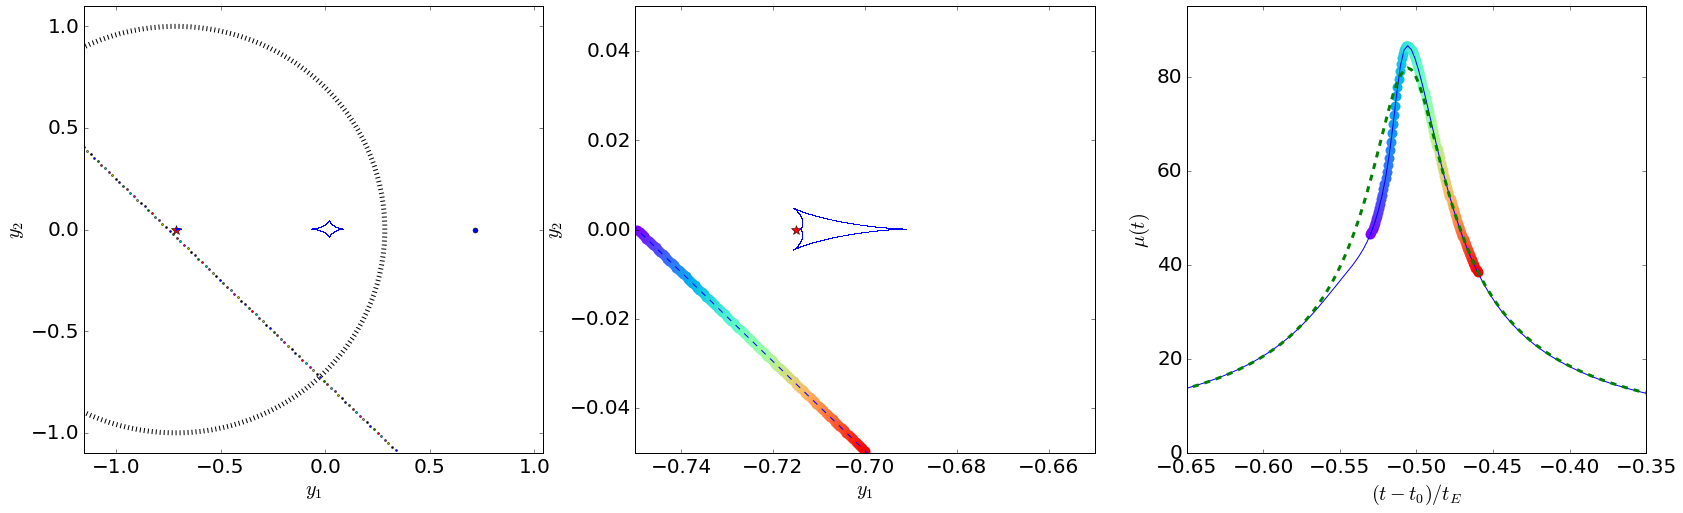

In [84]:
# plot the results

fig,ax=plt.subplots(1,3,figsize=(28,8))
ax[0].plot(xs,ys,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')


ax[0].plot([z_1.real],[z_1.imag],'o',markersize=5,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)
ax[1].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)

# set dimensions of source plane plotting area
xmin=-0.9#np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

ax[1].set_xlim([-0.75,-0.65])
ax[1].set_ylim([-0.05,0.05])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

# Plot the Einstein ring of a lens with mass = m1+m2 at the position of m2
circle=plt.Circle((z_2.real,z_2.imag),1.0,color='black',fill=False,ls=':',lw=5)
ax[0].add_artist(circle)

# set up a moving source


def zcomplex(y0,p,theta):
    zreal=np.cos(theta)*p+np.sin(theta)*y0
    zimag=-np.sin(theta)*p+np.cos(theta)*y0
    z=complex(zreal,zimag)
    return(z)
    
p_large=np.linspace(-1.2,1.2,100)
p=np.linspace(-0.53,-0.46,100)
theta=np.pi/4
y0=-0.53

#p=np.linspace(-0.05,0.05,100)
#theta=np.pi/2
#y0=-0.72

#p=np.linspace(-0.75,-0.65,100)
#theta=0.0
#y0=-0.02

color=iter(cm.rainbow(np.linspace(0,1,p.size)))
for i in range(p.size):
    c=next(color)
    zs=zcomplex(y0,p[i],theta)
    zs_large=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    ys1_large=[zs_large.real]
    ys2_large=[zs_large.imag]

    ax[0].plot(ys1_large,ys2_large,'o',markersize=2)
    ax[1].plot(ys1,ys2,'o',markeredgecolor='none',markersize=10,c=c)
    
    images=findImages(z_1,z_2,m1,m2,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)

    ax[2].plot([p[i]],[np.abs(mu).sum()],'o',markeredgecolor='none',markersize=10,c=c)
    
    #ax[0].plot([images.real],[images.imag],'o',markersize=10,c=c)
    
    
p_large=np.linspace(np.amin(p_large),np.amax(p_large),1000)
mu_=[]
mu__0=[]
yso1=[]
yso2=[]
for i in range(p_large.size):
    zs=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    images=findImages(z_1,z_2,m1,m2,zs)
    images_0=findImages(z_1,z_2,0.0,1.0,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)
    mu_0=1.0/detA(0.0,1.0,z_1,z_2,images_0)
    mu_.append(np.abs(mu).sum())
    mu__0.append(np.abs(mu_0).sum())
    yso1.append(ys1)
    yso2.append(ys2)
    
ax[2].plot(p_large,mu_,'-') 
ax[2].plot(p_large,mu__0,'--',lw=3)
ax[1].plot(yso1,yso2,'--')
ax[2].set_ylim([0.0,95])
ax[2].set_xlim([-0.65,-0.35])
#ax[2].set_xlim([-0.75,-0.65])

ax[2].xaxis.set_tick_params(labelsize=20)
ax[2].yaxis.set_tick_params(labelsize=20)
ax[2].set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax[2].set_ylabel('$\mu(t)$',fontsize=20)

## Planetary caustics in close topologies

When the distance between the star and the planet is $d<d_c$, additional two "planetary caustics" form, which are symmetric with respect to the axis connecting the lenses:

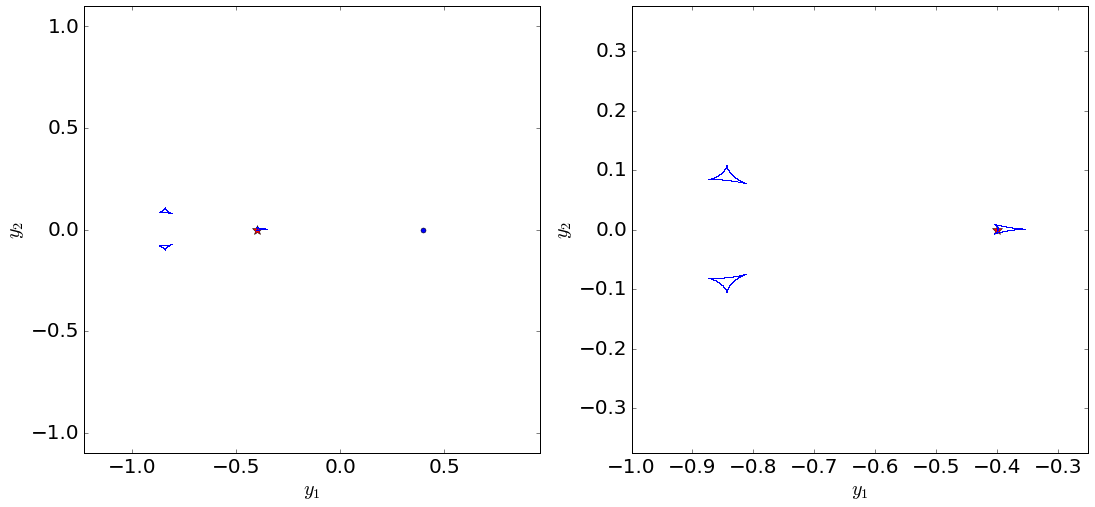

In [85]:
# parameters defining the system
q=0.003 # mass ratio
d=0.8 # distance between the two masses

# positions of the two lenses (symmetric with respect to the origin and along the x_1 axis)
z_1=complex(d/2.0,0.0)
z_2=-z_1

# (fractional) masses of the two lenses
m2=1.0/(1.0+q)
m1=1.0-m2

# set the phase vector
phi_=np.linspace(0,2.*np.pi,10000)

fig,ax=plt.subplots(1,2,figsize=(18,8))

x=[]
y=[]
xs=[]
ys=[]

# we need to find the roots of our fourth order polynomial for each value of phi
for i in range(phi_.size):
    phi=phi_[i]
    # the coefficients of the complex polynomial
    coefficients = [1.0,0.0,-2*np.conj(z_1)**2-np.exp(1j*phi),-np.conj(z_1)*2*(m1-m2)*np.exp(1j*phi),np.conj(z_1)**2*(np.conj(z_1)**2-np.exp(1j*phi))]
    # use the numpy function roots to find the roots of the polynomial
    z=np.roots(coefficients) # these are the critical points!
    
    # use the lens equation (complex form) to map the critical points on the source plane 
    zs=z-m1/(np.conj(z)-np.conj(z_1))-m2/((np.conj(z)-np.conj(-z_1))) # these are the caustics!
    
    # append critical and caustic points
    x.append(z.real)
    y.append(z.imag)
    xs.append(zs.real)
    ys.append(zs.imag)
    
# plot the results
ax[0].plot(xs,ys,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')


ax[0].plot([z_1.real],[z_1.imag],'o',markersize=5,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)
ax[1].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)

# set dimensions of source plane plotting area
xmin=-0.9#np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

ax[1].set_xlim([-1.0,-0.25])
ax[1].set_ylim([-0.375,0.375])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

The following example shows what kind of effects these caustics have on the light curve:

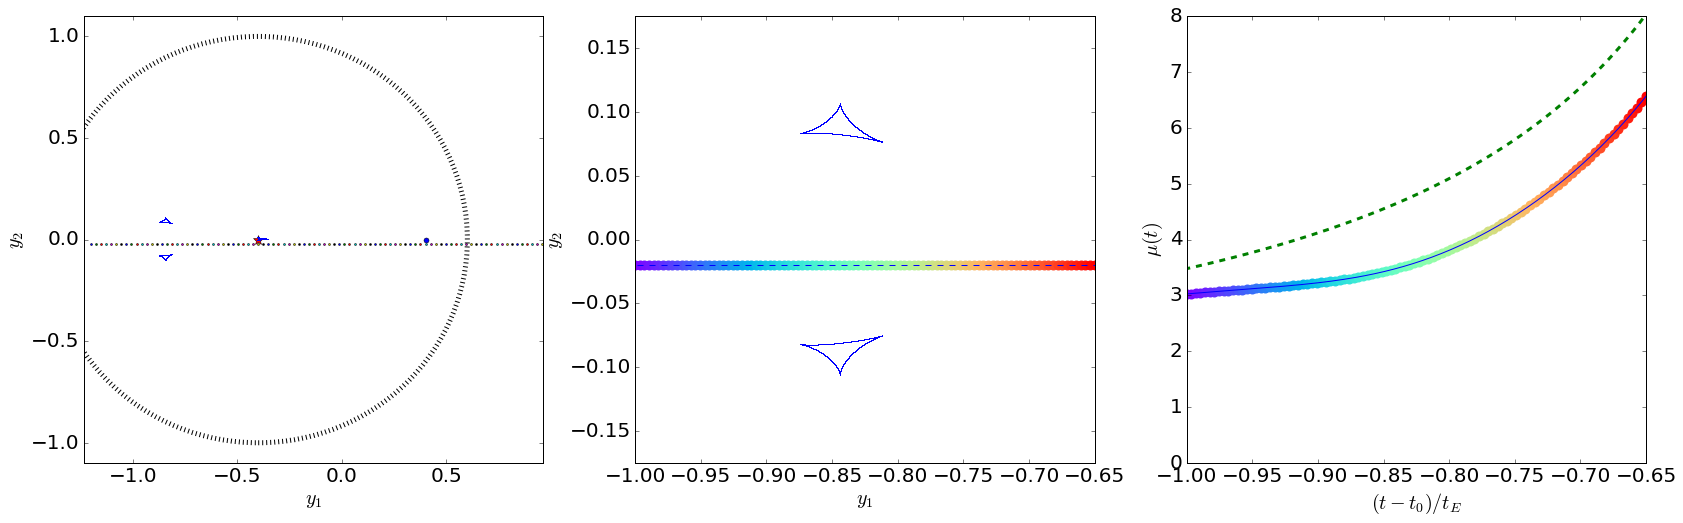

In [86]:
# plot the results

fig,ax=plt.subplots(1,3,figsize=(28,8))
ax[0].plot(xs,ys,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')


ax[0].plot([z_1.real],[z_1.imag],'o',markersize=5,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)
ax[1].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)

# set dimensions of source plane plotting area
xmin=-0.9#np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

ax[1].set_xlim([-1.0,-0.65])
ax[1].set_ylim([-0.175,0.175])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

# Plot the Einstein ring of a lens with mass = m1+m2 at the position of m2
circle=plt.Circle((z_2.real,z_2.imag),1.0,color='black',fill=False,ls=':',lw=5)
ax[0].add_artist(circle)

# set up a moving source


def zcomplex(y0,p,theta):
    zreal=np.cos(theta)*p+np.sin(theta)*y0
    zimag=-np.sin(theta)*p+np.cos(theta)*y0
    z=complex(zreal,zimag)
    return(z)
    
p_large=np.linspace(-1.2,1.2,100)
#p=np.linspace(-0.78,-0.39,100)
#theta=np.pi/4
#y0=-0.9

#p=np.linspace(-0.18,0.18,100)
#theta=np.pi/2
#y0=-0.78

p=np.linspace(-1.,-0.65,100)
theta=0.0
y0=-0.02

color=iter(cm.rainbow(np.linspace(0,1,p.size)))
for i in range(p.size):
    c=next(color)
    zs=zcomplex(y0,p[i],theta)
    zs_large=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    ys1_large=[zs_large.real]
    ys2_large=[zs_large.imag]

    ax[0].plot(ys1_large,ys2_large,'o',markersize=2)
    ax[1].plot(ys1,ys2,'o',markeredgecolor='none',markersize=10,c=c)
    
    images=findImages(z_1,z_2,m1,m2,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)

    ax[2].plot([p[i]],[np.abs(mu).sum()],'o',markeredgecolor='none',markersize=10,c=c)
    
    #ax[0].plot([images.real],[images.imag],'o',markersize=10,c=c)
    
    
p_large=np.linspace(np.amin(p_large),np.amax(p_large),1000)
mu_=[]
mu__0=[]
yso1=[]
yso2=[]
for i in range(p_large.size):
    zs=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    images=findImages(z_1,z_2,m1,m2,zs)
    images_0=findImages(z_1,z_2,0.0,1.0,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)
    mu_0=1.0/detA(0.0,1.0,z_1,z_2,images_0)
    mu_.append(np.abs(mu).sum())
    mu__0.append(np.abs(mu_0).sum())
    yso1.append(ys1)
    yso2.append(ys2)
    
ax[2].plot(p_large,mu_,'-') 
ax[2].plot(p_large,mu__0,'--',lw=3)
ax[1].plot(yso1,yso2,'--')
ax[2].set_ylim([0.0,8])
ax[2].set_xlim([-1,-0.65])
#ax[2].set_xlim([-0.75,-0.65])

ax[2].xaxis.set_tick_params(labelsize=20)
ax[2].yaxis.set_tick_params(labelsize=20)
ax[2].set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax[2].set_ylabel('$\mu(t)$',fontsize=20)

## Planetary caustics in wide topologies

In wide topologies, the planerary caustic is an astroid with four cusps. 

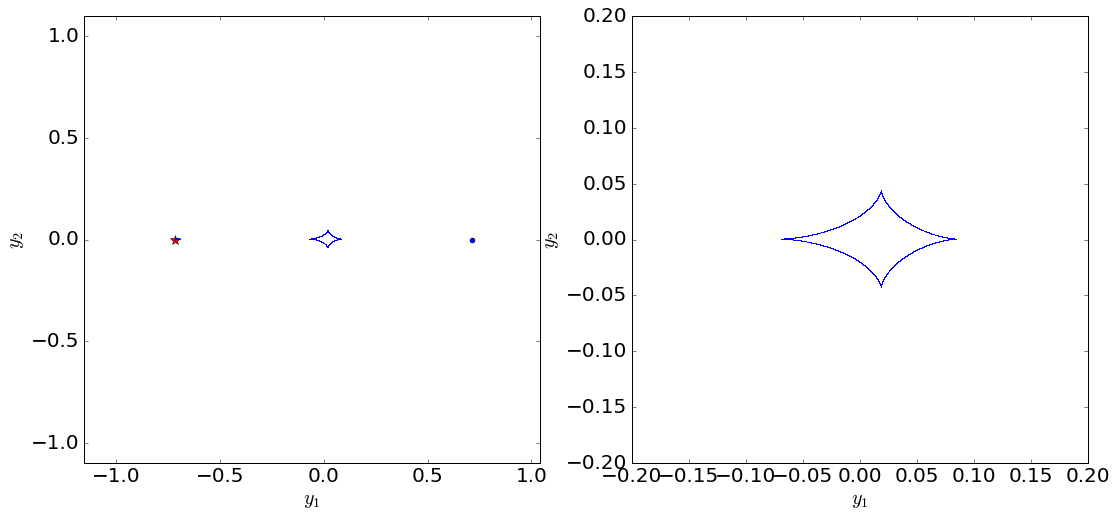

In [87]:
# parameters defining the system
q=0.003 # mass ratio
d=1.43 # distance between the two masses

# positions of the two lenses (symmetric with respect to the origin and along the x_1 axis)
z_1=complex(d/2.0,0.0)
z_2=-z_1

# (fractional) masses of the two lenses
m2=1.0/(1.0+q)
m1=1.0-m2

# set the phase vector
phi_=np.linspace(0,2.*np.pi,10000)

fig,ax=plt.subplots(1,2,figsize=(18,8))

x=[]
y=[]
xs=[]
ys=[]

# we need to find the roots of our fourth order polynomial for each value of phi
for i in range(phi_.size):
    phi=phi_[i]
    # the coefficients of the complex polynomial
    coefficients = [1.0,0.0,-2*np.conj(z_1)**2-np.exp(1j*phi),-np.conj(z_1)*2*(m1-m2)*np.exp(1j*phi),np.conj(z_1)**2*(np.conj(z_1)**2-np.exp(1j*phi))]
    # use the numpy function roots to find the roots of the polynomial
    z=np.roots(coefficients) # these are the critical points!
    
    # use the lens equation (complex form) to map the critical points on the source plane 
    zs=z-m1/(np.conj(z)-np.conj(z_1))-m2/((np.conj(z)-np.conj(-z_1))) # these are the caustics!
    
    # append critical and caustic points
    x.append(z.real)
    y.append(z.imag)
    xs.append(zs.real)
    ys.append(zs.imag)
    
# plot the results
ax[0].plot(xs,ys,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')


ax[0].plot([z_1.real],[z_1.imag],'o',markersize=5,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)
ax[1].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)

# set dimensions of source plane plotting area
xmin=-0.9#np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

ax[1].set_xlim([-0.2,0.2])
ax[1].set_ylim([-0.2,0.2])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

The perturbations to the light curve depend again on the trajectory of the source and on how close to the planetary caustic it passes. The cusps are, as usual, points of very high magnification. Around them, there are lobes of positive magnification compared to the single lens case. On the contrary there are regions of negative deviation from the single lens case just outside the fold of the caustic between the central and the planetary caustic.

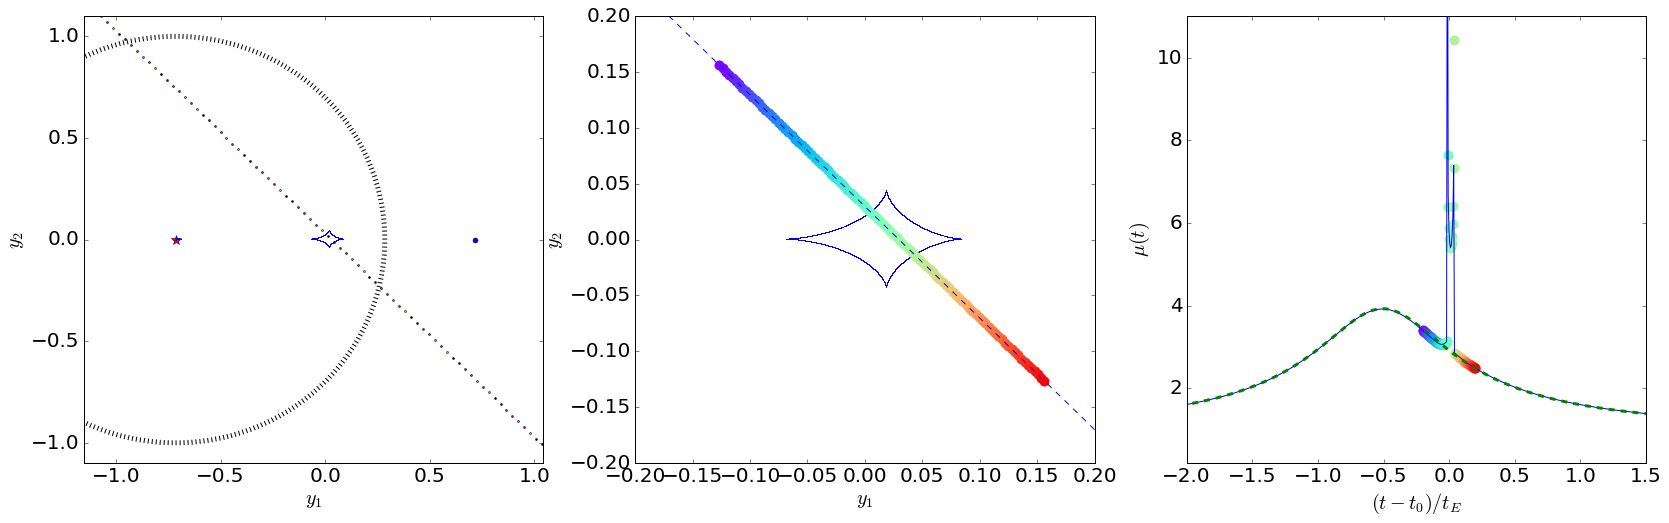

In [91]:
# plot the results

fig,ax=plt.subplots(1,3,figsize=(28,8))
ax[0].plot(xs,ys,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')


ax[0].plot([z_1.real],[z_1.imag],'o',markersize=5,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)
ax[1].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)

# set dimensions of source plane plotting area
xmin=-0.9#np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

ax[1].set_xlim([-0.2,0.2])
ax[1].set_ylim([-0.2,0.2])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

# Plot the Einstein ring of a lens with mass = m1+m2 at the position of m2
circle=plt.Circle((z_2.real,z_2.imag),1.0,color='black',fill=False,ls=':',lw=5)
ax[0].add_artist(circle)

# set up a moving source


def zcomplex(y0,p,theta):
    zreal=np.cos(theta)*p+np.sin(theta)*y0
    zimag=-np.sin(theta)*p+np.cos(theta)*y0
    z=complex(zreal,zimag)
    return(z)
    
p_large=np.linspace(-2.5,3.5,150)
p=np.linspace(-0.2,0.2,100)
theta=np.pi/4
y0=0.021

#p=np.linspace(-0.18,0.18,100)
#theta=np.pi/2
#y0=0.1

#p=np.linspace(-0.2,0.2,100)
#theta=0.0
#y0=-0.02

color=iter(cm.rainbow(np.linspace(0,1,p.size)))
for i in range(p.size):
    c=next(color)
    zs=zcomplex(y0,p[i],theta)
    zs_large=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    ys1_large=[zs_large.real]
    ys2_large=[zs_large.imag]

    ax[0].plot(ys1_large,ys2_large,'o',markersize=2)
    ax[1].plot(ys1,ys2,'o',markeredgecolor='none',markersize=10,c=c)
    
    images=findImages(z_1,z_2,m1,m2,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)

    ax[2].plot([p[i]],[np.abs(mu).sum()],'o',markeredgecolor='none',markersize=10,c=c)
    
    #ax[0].plot([images.real],[images.imag],'o',markersize=10,c=c)
    
    
p_large=np.linspace(np.amin(p_large),np.amax(p_large),1000)
mu_=[]
mu__0=[]
yso1=[]
yso2=[]
for i in range(p_large.size):
    zs=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    images=findImages(z_1,z_2,m1,m2,zs)
    images_0=findImages(z_1,z_2,0.0,1.0,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)
    mu_0=1.0/detA(0.0,1.0,z_1,z_2,images_0)
    mu_.append(np.abs(mu).sum())
    mu__0.append(np.abs(mu_0).sum())
    yso1.append(ys1)
    yso2.append(ys2)
    
ax[2].plot(p_large,mu_,'-') 
ax[2].plot(p_large,mu__0,'--',lw=3)
ax[1].plot(yso1,yso2,'--')
ax[2].set_ylim([0.2,11])
ax[2].set_xlim([-2.0,1.5])
#ax[2].set_xlim([-0.75,-0.65])

ax[2].xaxis.set_tick_params(labelsize=20)
ax[2].yaxis.set_tick_params(labelsize=20)
ax[2].set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax[2].set_ylabel('$\mu(t)$',fontsize=20)

## Planetary caustics in intermediate or resonant topologies

In resonant topologies, there is a unique caustic, characterized by six cusps. In the case of planetary microlensing the shape of the cusp is very asymmetric (it tends to fold onto one point on the side of the star and to be much more elongated towards the planet).

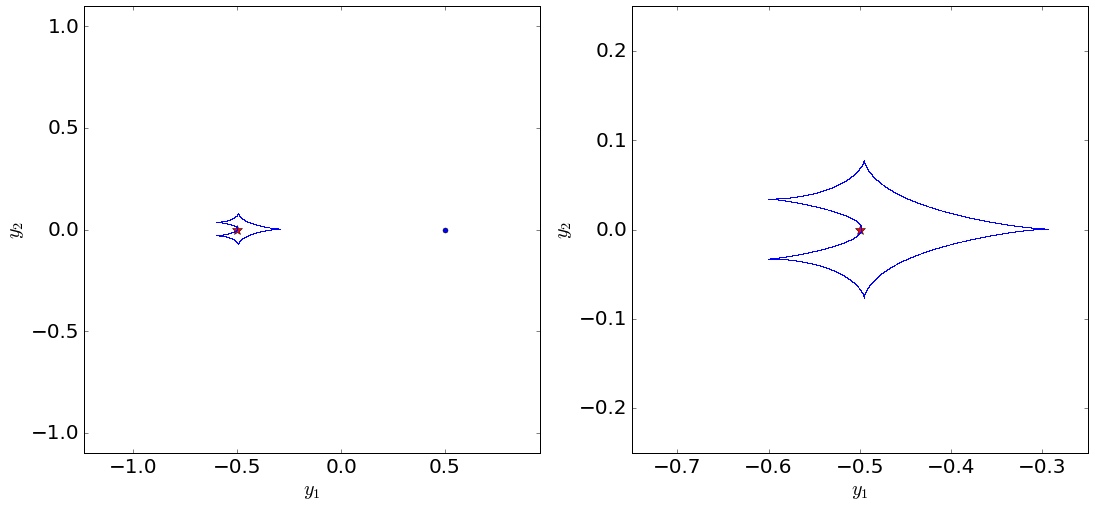

In [54]:
# parameters defining the system
q=0.003 # mass ratio
d=1.0 # distance between the two masses

# positions of the two lenses (symmetric with respect to the origin and along the x_1 axis)
z_1=complex(d/2.0,0.0)
z_2=-z_1

# (fractional) masses of the two lenses
m2=1.0/(1.0+q)
m1=1.0-m2

# set the phase vector
phi_=np.linspace(0,2.*np.pi,10000)

fig,ax=plt.subplots(1,2,figsize=(18,8))

x=[]
y=[]
xs=[]
ys=[]

# we need to find the roots of our fourth order polynomial for each value of phi
for i in range(phi_.size):
    phi=phi_[i]
    # the coefficients of the complex polynomial
    coefficients = [1.0,0.0,-2*np.conj(z_1)**2-np.exp(1j*phi),-np.conj(z_1)*2*(m1-m2)*np.exp(1j*phi),np.conj(z_1)**2*(np.conj(z_1)**2-np.exp(1j*phi))]
    # use the numpy function roots to find the roots of the polynomial
    z=np.roots(coefficients) # these are the critical points!
    
    # use the lens equation (complex form) to map the critical points on the source plane 
    zs=z-m1/(np.conj(z)-np.conj(z_1))-m2/((np.conj(z)-np.conj(-z_1))) # these are the caustics!
    
    # append critical and caustic points
    x.append(z.real)
    y.append(z.imag)
    xs.append(zs.real)
    ys.append(zs.imag)
    
# plot the results
ax[0].plot(xs,ys,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')


ax[0].plot([z_1.real],[z_1.imag],'o',markersize=5,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)
ax[1].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)

# set dimensions of source plane plotting area
xmin=-0.9#np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

ax[1].set_xlim([-0.75,-0.25])
ax[1].set_ylim([-0.25,0.25])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

The size of the caustic is typically much bigger than in the case of close and wide systems. Therefore, the cross section of this kind of events is higher than in the other two cases. Moreover, the perturbation can last a significant fraction of the primary event timescale.

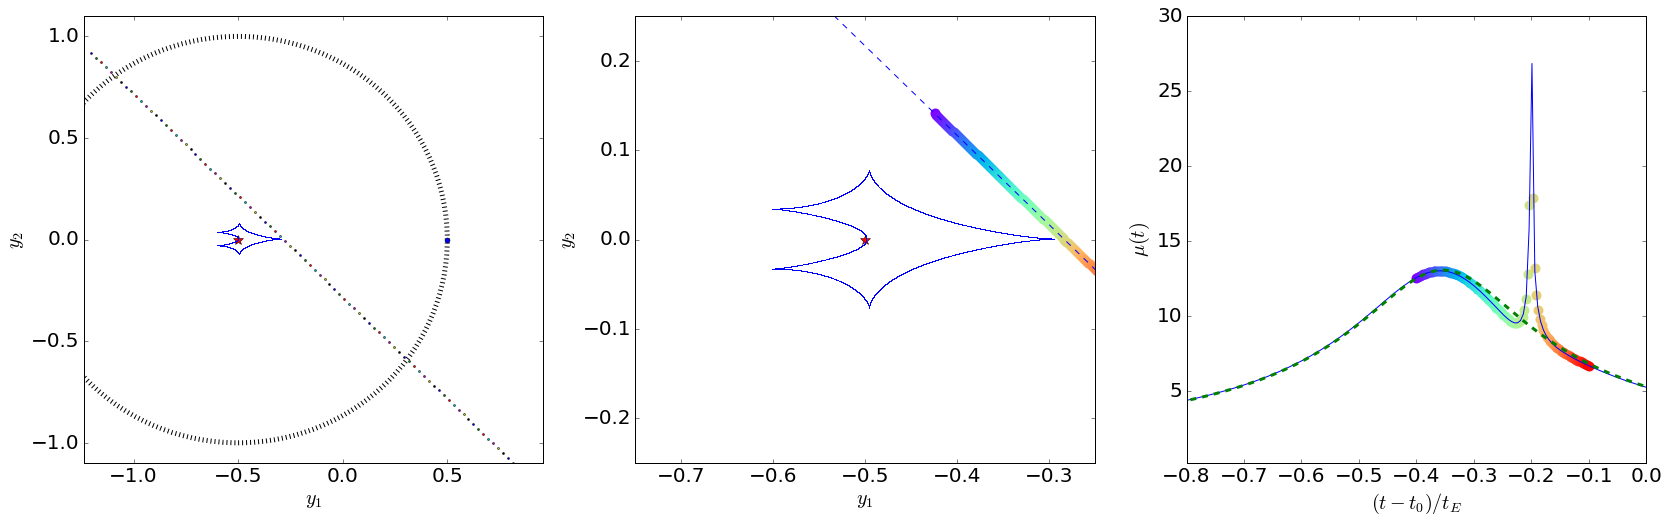

In [81]:
# plot the results

fig,ax=plt.subplots(1,3,figsize=(28,8))
ax[0].plot(xs,ys,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')


ax[0].plot([z_1.real],[z_1.imag],'o',markersize=5,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)
ax[1].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)

# set dimensions of source plane plotting area
xmin=-0.9#np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

ax[1].set_xlim([-0.75,-0.25])
ax[1].set_ylim([-0.25,0.25])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

# Plot the Einstein ring of a lens with mass = m1+m2 at the position of m2
circle=plt.Circle((z_2.real,z_2.imag),1.0,color='black',fill=False,ls=':',lw=5)
ax[0].add_artist(circle)

# set up a moving source


def zcomplex(y0,p,theta):
    zreal=np.cos(theta)*p+np.sin(theta)*y0
    zimag=-np.sin(theta)*p+np.cos(theta)*y0
    z=complex(zreal,zimag)
    return(z)
    
p_large=np.linspace(-1.5,3.5,150)
p=np.linspace(-0.4,-0.1,100)
theta=np.pi/4
y0=-0.2

#p=np.linspace(-0.18,0.18,100)
#theta=np.pi/2
#y0=0.1

#p=np.linspace(-0.2,0.2,100)
#theta=0.0
#y0=-0.02

color=iter(cm.rainbow(np.linspace(0,1,p.size)))
for i in range(p.size):
    c=next(color)
    zs=zcomplex(y0,p[i],theta)
    zs_large=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    ys1_large=[zs_large.real]
    ys2_large=[zs_large.imag]

    ax[0].plot(ys1_large,ys2_large,'o',markersize=2)
    ax[1].plot(ys1,ys2,'o',markeredgecolor='none',markersize=10,c=c)
    
    images=findImages(z_1,z_2,m1,m2,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)

    ax[2].plot([p[i]],[np.abs(mu).sum()],'o',markeredgecolor='none',markersize=10,c=c)
    
    #ax[0].plot([images.real],[images.imag],'o',markersize=10,c=c)
    
    
p_large=np.linspace(np.amin(p_large),np.amax(p_large),1000)
mu_=[]
mu__0=[]
yso1=[]
yso2=[]
for i in range(p_large.size):
    zs=zcomplex(y0,p_large[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    images=findImages(z_1,z_2,m1,m2,zs)
    images_0=findImages(z_1,z_2,0.0,1.0,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)
    mu_0=1.0/detA(0.0,1.0,z_1,z_2,images_0)
    mu_.append(np.abs(mu).sum())
    mu__0.append(np.abs(mu_0).sum())
    yso1.append(ys1)
    yso2.append(ys2)
    
ax[2].plot(p_large,mu_,'-') 
ax[2].plot(p_large,mu__0,'--',lw=3)
ax[1].plot(yso1,yso2,'--')
ax[2].set_ylim([0.2,30])
ax[2].set_xlim([-0.8,0.0])
#ax[2].set_xlim([-0.75,-0.65])

ax[2].xaxis.set_tick_params(labelsize=20)
ax[2].yaxis.set_tick_params(labelsize=20)
ax[2].set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax[2].set_ylabel('$\mu(t)$',fontsize=20)